<a href="https://colab.research.google.com/github/Sam-415/Marketing-research-methods---Samhita_-Jio-Institute/blob/12th-Feb/Session10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv('/content/customers.csv')
order_items_df = pd.read_csv('/content/order_items.csv')
orders_df = pd.read_csv('/content/orders1.csv')

# Count items per order
items_per_order = order_items_df.groupby('order_id').size().reset_index(name='num_items')

# Merge orders with customers to get city information
orders_with_customer = pd.merge(
    orders_df[['order_id', 'customer_id']],
    customers_df[['customer_id', 'customer_city']],
    on='customer_id',
    how='inner'
)

# Merge with the items_per_order dataframe
orders_with_items_and_city = pd.merge(
    items_per_order,
    orders_with_customer,
    on='order_id',
    how='inner'
)

# Calculate average items per order for each city
avg_items_by_city = orders_with_items_and_city.groupby('customer_city')['num_items'].agg(['mean', 'count']).reset_index()
avg_items_by_city.columns = ['customer_city', 'avg_items', 'order_count']
avg_items_by_city = avg_items_by_city.sort_values('avg_items', ascending=False)

# Print the results
print("Top 20 cities by average products per order:")
print(avg_items_by_city.head(20))

print("\nBottom 5 cities by average products per order:")
print(avg_items_by_city.tail(5))

print("\nSummary Statistics:")
print(f"Number of cities: {len(avg_items_by_city)}")
print(f"Minimum average: {avg_items_by_city['avg_items'].min():.2f}")
print(f"Maximum average: {avg_items_by_city['avg_items'].max():.2f}")
print(f"Overall average: {avg_items_by_city['avg_items'].mean():.2f}")

# Create visualizations
plt.figure(figsize=(14, 10))
sns.barplot(x='avg_items', y='customer_city', data=avg_items_by_city.head(20))
plt.title('Top 20 Cities by Average Number of Products per Order')
plt.xlabel('Average Number of Products')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('top_cities_by_avg_products.png')
plt.close()

# Create a histogram of the distribution
plt.figure(figsize=(14, 8))
sns.histplot(avg_items_by_city['avg_items'], bins=30)
plt.title('Distribution of Average Products per Order Across All Cities')
plt.xlabel('Average Number of Products')
plt.ylabel('Number of Cities')
plt.tight_layout()
plt.savefig('distribution_avg_products_by_city.png')
plt.close()

# Create a scatter plot of average items vs order count
plt.figure(figsize=(14, 8))
sns.scatterplot(x='order_count', y='avg_items', data=avg_items_by_city, alpha=0.5)
plt.title('Average Products per Order vs Number of Orders by City')
plt.xlabel('Number of Orders')
plt.ylabel('Average Products per Order')
plt.tight_layout()
plt.savefig('avg_products_vs_order_count.png')
plt.close()

# Filter to cities with at least 10 orders for a more meaningful analysis
cities_with_sufficient_data = avg_items_by_city[avg_items_by_city['order_count'] >= 10].copy()
cities_with_sufficient_data = cities_with_sufficient_data.sort_values('avg_items', ascending=False)

print("\nTop 20 cities with at least 10 orders:")
print(cities_with_sufficient_data.head(20))

# Create visualization for cities with sufficient data
plt.figure(figsize=(14, 10))
sns.barplot(x='avg_items', y='customer_city', data=cities_with_sufficient_data.head(20))
plt.title('Top 20 Cities (with ≥10 orders) by Average Products per Order')
plt.xlabel('Average Number of Products')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('top_cities_sufficient_data.png')
plt.close()

# Save the results to CSV
avg_items_by_city.to_csv('avg_products_per_order_by_city.csv', index=False)
cities_with_sufficient_data.to_csv('avg_products_per_order_cities_10plus_orders.csv', index=False)

print("\nAnalysis complete. Results and visualizations have been saved.")

Top 20 cities by average products per order:
             customer_city  avg_items  order_count
2215        padre carvalho        7.0            1
980                  datas        6.0            1
1406         inconfidentes        6.0            1
1919        matias olimpio        5.0            1
2391               picarra        4.0            1
2114            nova hartz        4.0            1
807             cidelandia        4.0            1
2343            pedregulho        4.0            1
3244       teixeira soares        4.0            1
2028    morro de sao paulo        4.0            1
464              brasileia        3.0            1
1503                 itaju        3.0            1
3161             silveiras        3.0            1
493                 buriti        3.0            1
1797          lucianopolis        3.0            1
378               belmonte        3.0            1
1151  formosa do rio preto        3.0            2
3349                 ubata        3.0

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02-10-2017 10:56,02-10-2017 11:07,04-10-2017 19:55,10-10-2017 21:25,18-10-2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24-07-2018 20:41,26-07-2018 03:24,26-07-2018 14:31,07-08-2018 15:27,13-08-2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08-08-2018 08:38,08-08-2018 08:55,08-08-2018 13:50,17-08-2018 18:06,04-09-2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18-11-2017 19:28,18-11-2017 19:45,22-11-2017 13:39,02-12-2017 00:28,15-12-2017 00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13-02-2018 21:18,13-02-2018 22:20,14-02-2018 19:46,16-02-2018 18:17,26-02-2018 00:00


,purchase_count,avg_price
count,32951.000000,32951.000000
mean,3.418713,145.302464
std,10.619709,246.895756
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,79.000000
75%,3.000000,154.900000
max,527.000000,6735.000000


Correlation between Product Price and Purchase Count: -0.032139862680945167


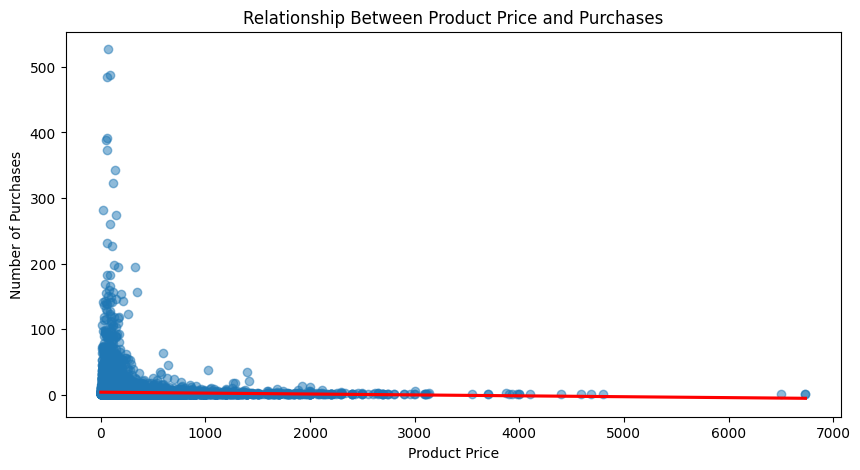

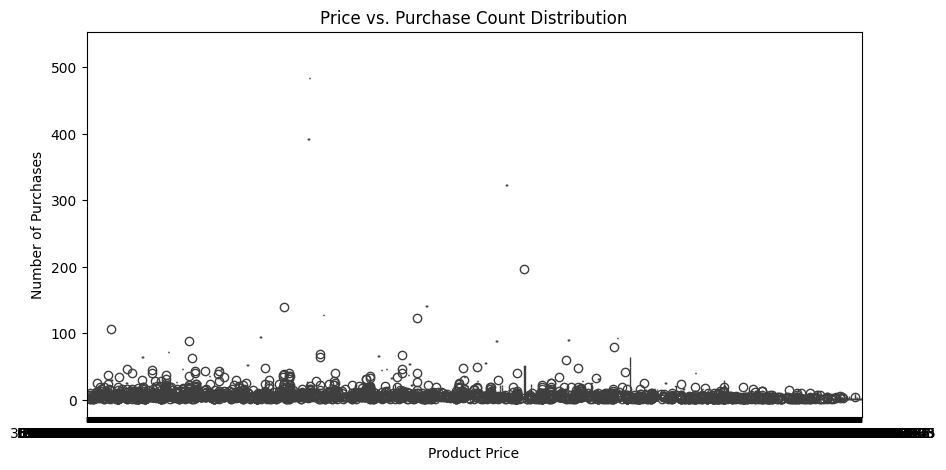

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
order_items = pd.read_csv('/content/order_items.csv')
products = pd.read_csv('/content/products.csv')
orders = pd.read_csv('/content/orders1.csv')

# Display first few rows of each dataset
display(order_items.head())
display(products.head())
display(orders.head())

# Merge order_items with products to get product details
df = order_items.merge(products, on='product_id', how='left')

# Group by product and calculate total purchases and average price
product_summary = df.groupby('product_id').agg(
    purchase_count=('order_id', 'count'),  # Number of times product was purchased
    avg_price=('price', 'mean')  # Average price of product
).reset_index()

# Summary statistics
display(product_summary.describe())

# Correlation analysis
correlation = product_summary['avg_price'].corr(product_summary['purchase_count'])
print(f'Correlation between Product Price and Purchase Count: {correlation}')

# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x=product_summary['avg_price'], y=product_summary['purchase_count'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Product Price')
plt.ylabel('Number of Purchases')
plt.title('Relationship Between Product Price and Purchases')
plt.show()

# Boxplot to check distribution
plt.figure(figsize=(10, 5))
sns.boxplot(data=product_summary, x='avg_price', y='purchase_count')
plt.xlabel('Product Price')
plt.ylabel('Number of Purchases')
plt.title('Price vs. Purchase Count Distribution')
plt.show()

                        customer_id                          order_id   price  \
0  00012a2ce6f8dcda20d059ce98491703  5f79b5b0931d63f1a42989eb65b9da6e   89.80   
1  000161a058600d5901f007fab4c27140  a44895d095d7e0702b6a162fa2dbeced   54.90   
2  0001fd6190edaaf884bcaf3d49edf079  316a104623542e4d75189bb372bc5f8d  179.99   
3  0002414f95344307404f0ace7a26f1d5  5825ce2e88d5346438686b0bba99e5ee  149.90   
4  000379cdec625522490c315e70c7a9fb  0ab7fb08086d4af9141453c91878ed7a   93.00   
5  0004164d20a9e969af783496f3408652  cd3558a10d854487b4f907e9b326a4fc   59.99   
6  000419c5494106c306a97b5635748086  07f6c3baf9ac86865b60f640c4f923c6   34.30   
7  00046a560d407e99b969756e0b10f282  8c3d752c5c02227878fae49aeaddbfd7  120.90   
8  0005aefbb696d34b3424dccd0a0e9fd0  263ba12390d0fbce329dd16da8cd20f8  134.90   
9  00066ccbe787a588c52bd5ff404590e3  728416b0db65935dbf78a0cc03e8d6f8  199.60   

   moving_avg  
0       89.80  
1       54.90  
2      179.99  
3      149.90  
4       93.00  
5       59.9

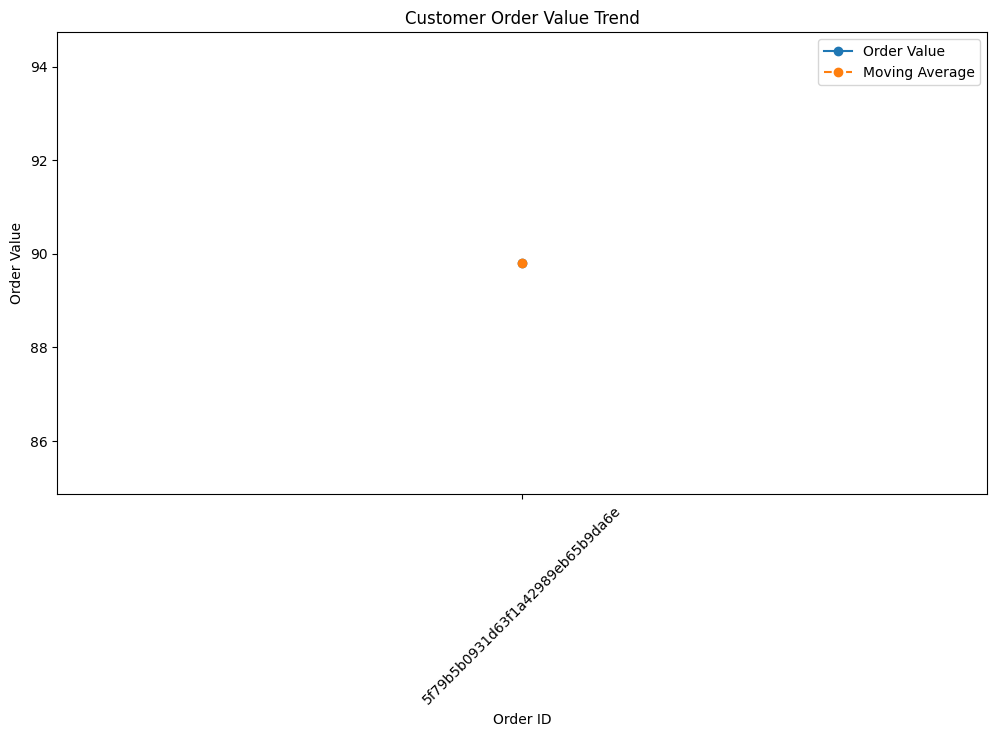

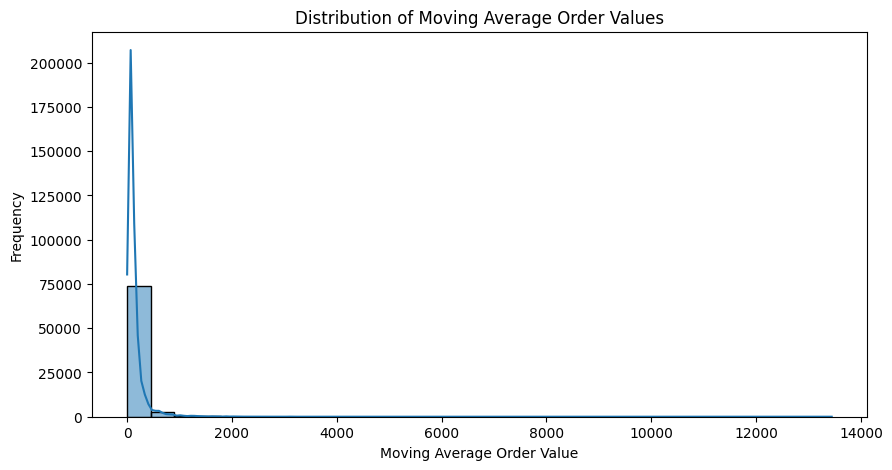

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/customers.csv')
orders = pd.read_csv('/content/orders1.csv')
order_items = pd.read_csv('/content/order_items.csv')

# Merge customers with orders
customer_orders = customers.merge(orders, on='customer_id', how='inner')

# Merge with order items to get order value
customer_orders = customer_orders.merge(order_items, on='order_id', how='inner')

# Calculate total order value per order
order_values = customer_orders.groupby(['customer_id', 'order_id'])['price'].sum().reset_index()

# Compute moving average (window size = 3 for recent trends)
order_values['moving_avg'] = order_values.groupby('customer_id')['price'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Display sample of results
print(order_values.head(10))

# Visualization: Moving Average of Order Values for a Sample Customer
sample_customer = order_values[order_values['customer_id'] == order_values['customer_id'].iloc[0]]
plt.figure(figsize=(12, 6))
plt.plot(sample_customer['order_id'], sample_customer['price'], marker='o', label='Order Value')
plt.plot(sample_customer['order_id'], sample_customer['moving_avg'], marker='o', linestyle='dashed', label='Moving Average')
plt.xlabel('Order ID')
plt.ylabel('Order Value')
plt.title('Customer Order Value Trend')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Distribution of moving average order values across customers
plt.figure(figsize=(10, 5))
sns.histplot(order_values['moving_avg'], bins=30, kde=True)
plt.title('Distribution of Moving Average Order Values')
plt.xlabel('Moving Average Order Value')
plt.ylabel('Frequency')
plt.show()

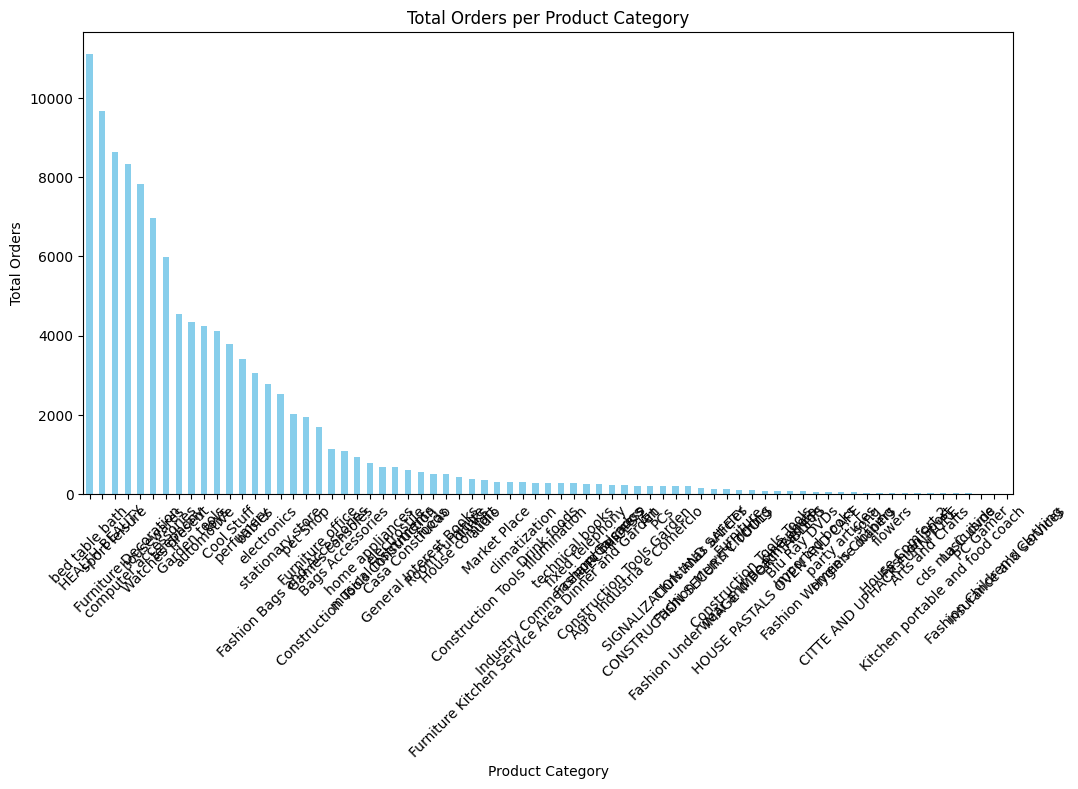

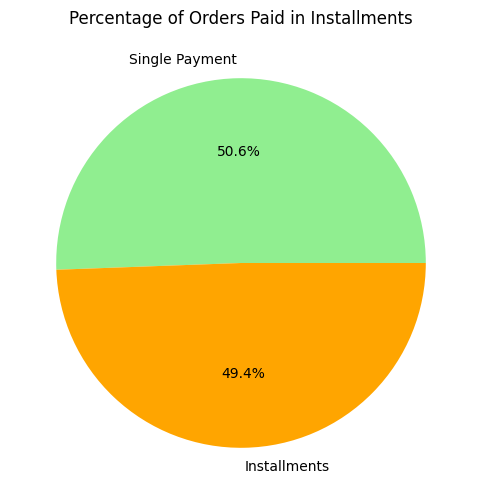

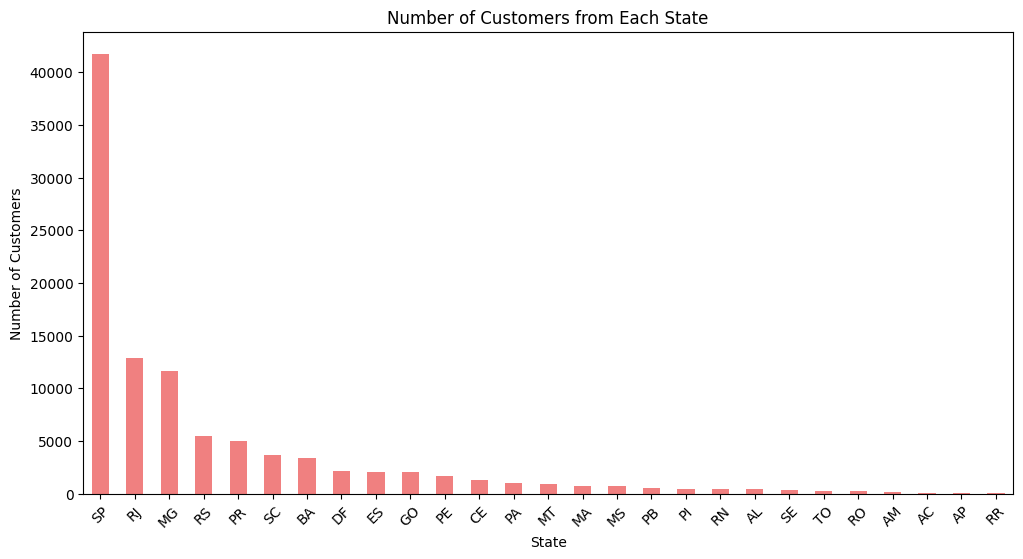

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
products_df = pd.read_csv("products.csv")
orders_df = pd.read_csv("orders1.csv")
order_items_df = pd.read_csv("order_items.csv")
payments_df = pd.read_csv("payments.csv")
customers_df = pd.read_csv("customers.csv")

# Merge order items with products to get product categories
merged_df = order_items_df.merge(products_df, on="product_id")
category_counts = merged_df["product category"].value_counts()

# Visualization: Total orders per product category
plt.figure(figsize=(12, 6))
category_counts.plot(kind="bar", color='skyblue')
plt.xlabel("Product Category")
plt.ylabel("Total Orders")
plt.title("Total Orders per Product Category")
plt.xticks(rotation=45)
plt.show()

# Calculate percentage of orders paid in installments
payments_df["installments_flag"] = payments_df["payment_installments"] > 1
installment_counts = payments_df["installments_flag"].value_counts(normalize=True) * 100

# Visualization: Percentage of installment payments
plt.figure(figsize=(6, 6))
installment_counts.plot(kind="pie", autopct='%1.1f%%', colors=["lightgreen", "orange"], labels=["Single Payment", "Installments"])
plt.title("Percentage of Orders Paid in Installments")
plt.ylabel("")  # Hide y-label for aesthetics
plt.show()

# Count the number of customers from each state
state_counts = customers_df["customer_state"].value_counts()

# Visualization: Number of customers per state
plt.figure(figsize=(12, 6))
state_counts.plot(kind="bar", color="lightcoral")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.title("Number of Customers from Each State")
plt.xticks(rotation=45)
plt.show()

Top 10 Sellers by Revenue:
                             seller_id  total_revenue
857   4869f7a5dfa277a7dca6462dcf3b52b2      229472.63
1013  53243585a1d6dc2643021fd1853d8905      222776.05
881   4a3ca9315b744ce9f8e9374361493884      200472.92
3024  fa1c13f2614d7b5c4749cbc52fecda94      194042.03
1535  7c67e1448b00f6e969d365cea6b010ab      187923.89
1560  7e93a43ef30c4f03f38b393420bc753a      176431.87
2643  da8622b14eb17ae2831f4ac5b9dab84a      160236.57
1505  7a67c85e85bb2ce8582c35f2203ad736      141745.53
192   1025f0e2d44d7041d6cf58b6550e0bfa      138968.55
1824  955fee9216a65b617aa5c0531780ce60      135171.70


<ipython-input-7-fb866df417c7>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_revenue.head(10)["seller_id"], y=seller_revenue.head(10)["total_revenue"], palette="Blues_d")


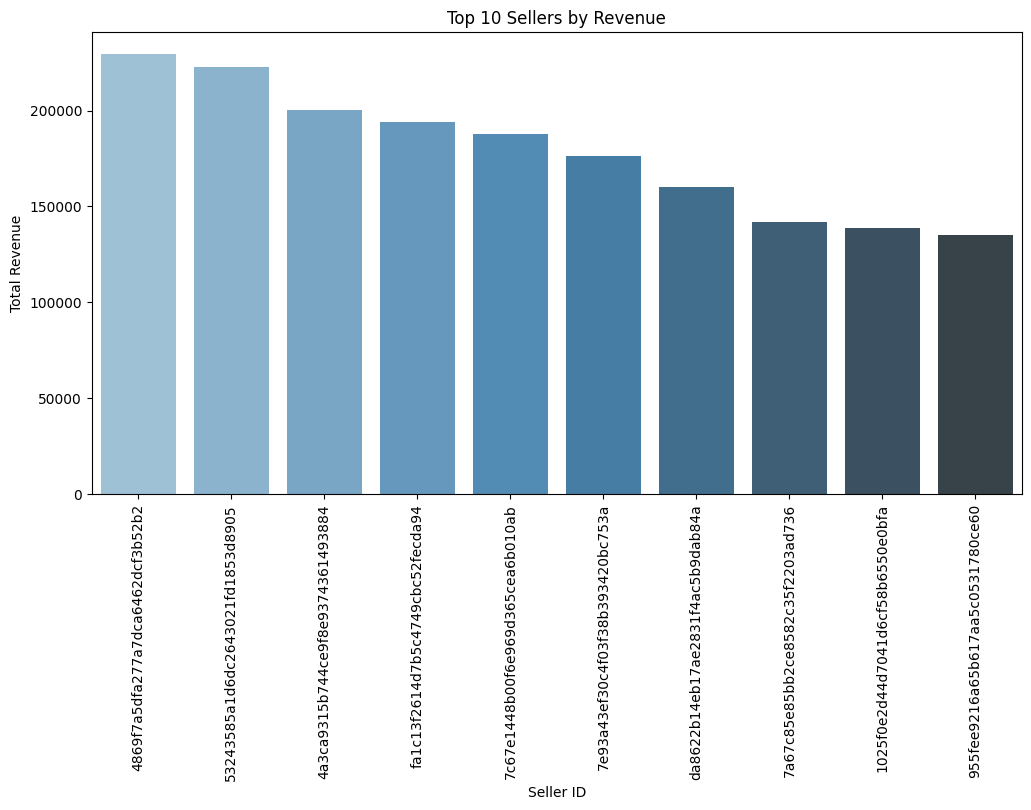

,seller_id,total_revenue
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1013,53243585a1d6dc2643021fd1853d8905,222776.05
881,4a3ca9315b744ce9f8e9374361493884,200472.92
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89
...,...,...
627,34aefe746cd81b7f3b23253ea28bef39,8.00
1370,702835e4b785b67a084280efca355756,7.60
373,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
1465,77128dec4bec4878c37ab7d6169d6f26,6.50


Full Seller Revenue Ranking:


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = "/content/order_items.csv"  # Update this with the actual file path

# Read the CSV file
order_items = pd.read_csv(file_path)

# Calculate total revenue for each seller
seller_revenue = order_items.groupby("seller_id")["price"].sum().reset_index()
seller_revenue.columns = ["seller_id", "total_revenue"]

# Rank sellers by revenue
seller_revenue = seller_revenue.sort_values(by="total_revenue", ascending=False)

# Display the top 10 sellers
print("Top 10 Sellers by Revenue:")
print(seller_revenue.head(10))

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=seller_revenue.head(10)["seller_id"], y=seller_revenue.head(10)["total_revenue"], palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel("Seller ID")
plt.ylabel("Total Revenue")
plt.title("Top 10 Sellers by Revenue")
plt.show()

# Generate a table of ranked sellers
from IPython.display import display

# Display the entire ranked seller revenue table
print("Full Seller Revenue Ranking:")
display(seller_revenue)

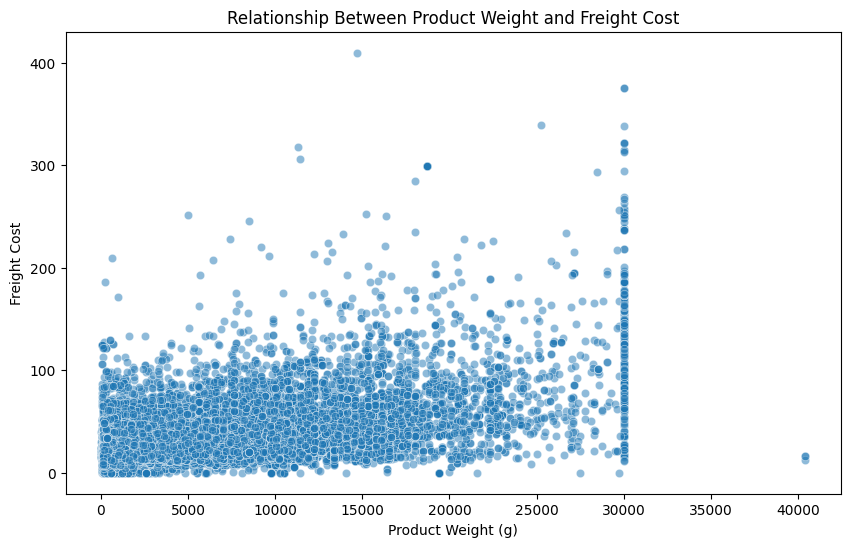

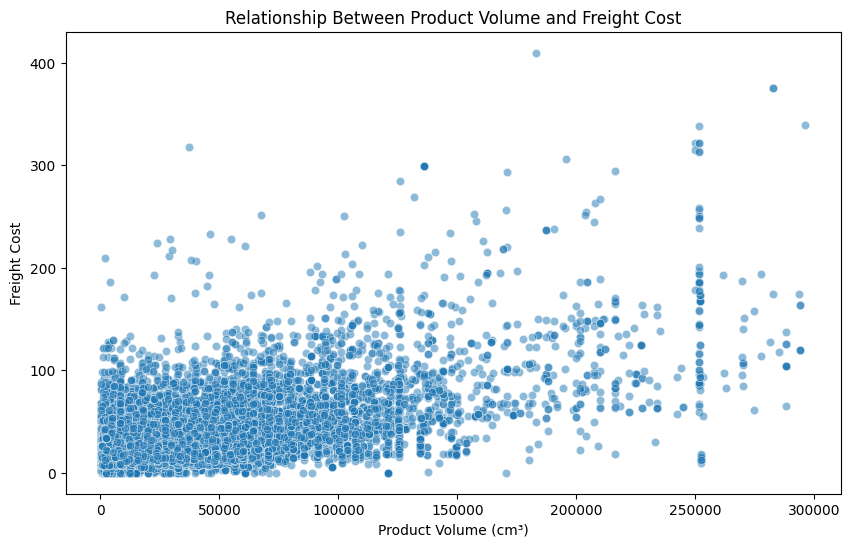

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orders_df = pd.read_csv("orders1.csv", parse_dates=["order_purchase_timestamp"])
order_items_df = pd.read_csv("order_items.csv")
products_df = pd.read_csv("products.csv")
order_products = order_items_df.merge(products_df, on="product_id")

# Scatter plot: Product Weight vs Freight Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_products, x="product_weight_g", y="freight_value", alpha=0.5)
plt.xlabel("Product Weight (g)")
plt.ylabel("Freight Cost")
plt.title("Relationship Between Product Weight and Freight Cost")
plt.show()

# Scatter plot: Product Volume vs Freight Cost
order_products["product_volume_cm3"] = order_products["product_length_cm"] * order_products["product_height_cm"] * order_products["product_width_cm"]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_products, x="product_volume_cm3", y="freight_value", alpha=0.5)
plt.xlabel("Product Volume (cm³)")
plt.ylabel("Freight Cost")
plt.title("Relationship Between Product Volume and Freight Cost")
plt.show()

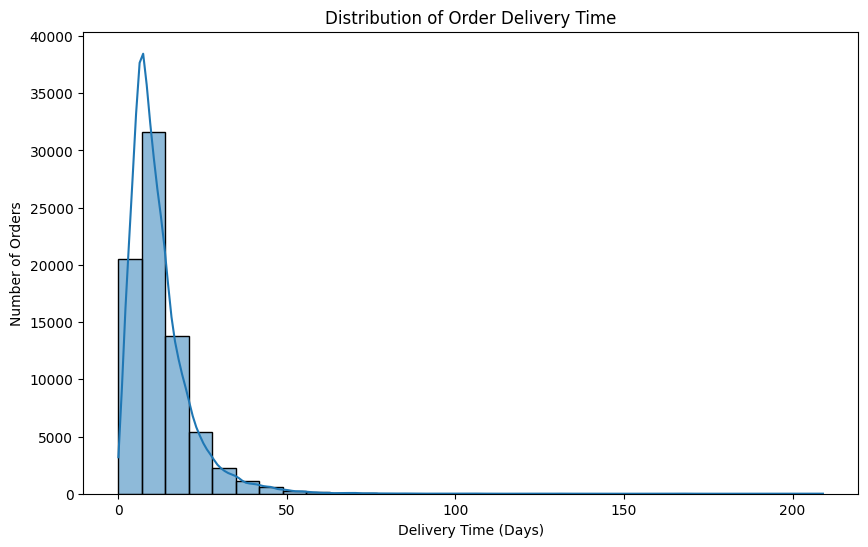

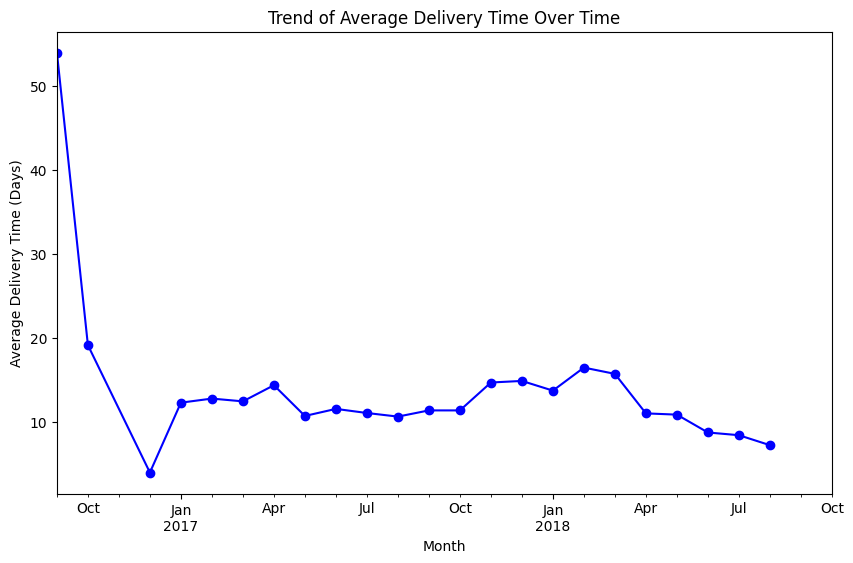

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orders_df = pd.read_csv("orders1.csv")
order_items_df = pd.read_csv("order_items.csv")
products_df = pd.read_csv("products.csv")

# Convert datetime columns with correct format
orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"], format="%d-%m-%Y %H:%M", errors="coerce"
)
orders_df["order_delivered_customer_date"] = pd.to_datetime(
    orders_df["order_delivered_customer_date"], format="%d-%m-%Y %H:%M", errors="coerce"
)

# Calculate delivery time
orders_df["delivery_time_days"] = (
    orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
).dt.days

# Plot histogram of delivery time
plt.figure(figsize=(10, 6))
sns.histplot(orders_df["delivery_time_days"].dropna(), bins=30, kde=True)
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Order Delivery Time")
plt.show()

# Scatter plot: Delivery Time vs Number of Orders per Month
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = orders_df.groupby("order_month")["delivery_time_days"].mean()

plt.figure(figsize=(10, 6))
monthly_orders.plot(kind="line", marker="o", color="blue")
plt.xlabel("Month")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Trend of Average Delivery Time Over Time")
plt.show()

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
dtype: object


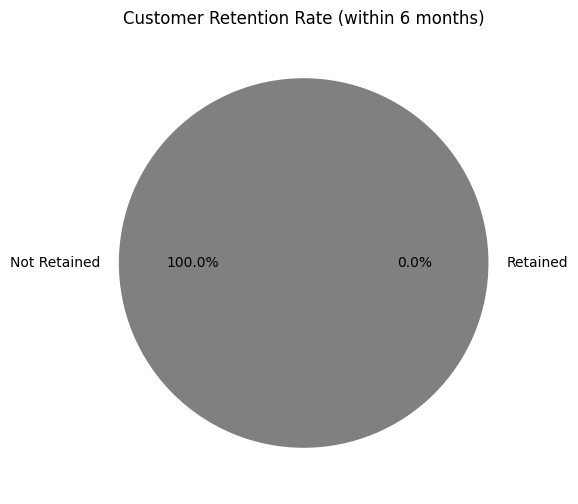

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orders_df = pd.read_csv("orders1.csv")
order_items_df = pd.read_csv("order_items.csv")
products_df = pd.read_csv("products.csv")
payments_df = pd.read_csv("payments.csv")
customers_df = pd.read_csv("customers.csv")

# Strip whitespace from column names
orders_df.columns = orders_df.columns.str.strip()
order_items_df.columns = order_items_df.columns.str.strip()
products_df.columns = products_df.columns.str.strip()
payments_df.columns = payments_df.columns.str.strip()
customers_df.columns = customers_df.columns.str.strip()

# Convert datetime columns with day-first format
orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"], dayfirst=True, errors="coerce"
)
orders_df["order_delivered_customer_date"] = pd.to_datetime(
    orders_df["order_delivered_customer_date"], dayfirst=True, errors="coerce"
)

# Verify conversion
print(orders_df.dtypes)

# Drop rows where conversion failed (optional)
orders_df = orders_df.dropna(subset=["order_purchase_timestamp"])

# Get first purchase date and total orders per customer
customer_orders = orders_df.groupby("customer_id")["order_purchase_timestamp"].agg(["min", "count"]).reset_index()
customer_orders.columns = ["customer_id", "first_purchase_date", "total_orders"]

# Merge with orders dataframe to track repeat purchases
repeat_customers = orders_df.merge(customer_orders, on="customer_id")

# Filter customers who made another purchase within 6 months
repeat_customers = repeat_customers[
    (repeat_customers["order_purchase_timestamp"] > repeat_customers["first_purchase_date"]) &
    ((repeat_customers["order_purchase_timestamp"] - repeat_customers["first_purchase_date"]).dt.days <= 180)
]

# Calculate retention rate
retention_rate = (repeat_customers["customer_id"].nunique() / customer_orders["customer_id"].nunique()) * 100

# Visualization: Retention Rate
labels = ["Retained", "Not Retained"]
sizes = [repeat_customers["customer_id"].nunique(), customer_orders["customer_id"].nunique() - repeat_customers["customer_id"].nunique()]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["lightblue", "gray"])
plt.title("Customer Retention Rate (within 6 months)")
plt.show()